## Packages and Bibliothèque

In [1]:
import os
import ast
import json
import re
from typing import List

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.stats import stats, shapiro, kstest, pearsonr

from src.module.processing import preprocessing as process

from src.module.processing.transforme import create_dfs_from_csvs, convert_prices_to_cfa
from src.utils.preprocessing.correlation_feactures import compute_correlation_matrix, compute_p_values, find_significant_correlations
from src.utils.preprocessing.precess import process_data

## Data Import

In [3]:
path_data_raw = "../data/raw/liste_fiches_technical_details.csv"
path_data_cleaning = "../data/cleaning/liste_fiches_technical_details_cleaning.csv"

In [9]:
df_raw = pd.read_csv(path_data_raw)

In [ ]:
df = df_raw.copy()

In [ ]:
df.head(10)

In [ ]:
df = df[['Marque', 'Modele', 'Annee', 'Vehicule', 'Prix', 'Date Publication',
         'Resumer', 'Dimensions', 'Weight', 'Habitability', 'Tires', 'Engine',
         'Transmission', 'Performance', 'Consumption', 'Immatriculation']]

In [ ]:
df.columns

## Data Preprocessing

In [ ]:
# Application des transformations avec pipe tout en gardant les mêmes colonnes
# df = (df
#             .pipe(process.clean_prix_column)
#             .pipe(process.convert_to_date)
#             .pipe(process.convert_column_to_int, 'Annee')
#             .pipe(lambda x: x.assign(Consumption=x['Consumption'].apply(process.clean_consumption)))
#             .pipe(lambda x: x.assign(Performance=x['Performance'].apply(process.clean_performance)))
#             .pipe(lambda x: x.assign(Habitability=x['Habitability'].apply(process.clean_habitability)))
#             .pipe(lambda x: x.assign(Dimensions=x['Dimensions'].apply(process.clean_dimensions)))
#             .pipe(lambda x: x.assign(Weight=x['Weight'].apply(process.clean_weight)))
#             .pipe(lambda x: x.assign(Engine=x['Engine'].apply(process.clean_engine)))
#             .pipe(lambda x: x.assign(Resumer=x['Resumer'].apply(process.clean_resumer)))
#             .pipe(lambda x: x.assign(Tires=x['Tires'].apply(process.clean_tires)))
#             )

## Data Cleaning Combine

In [4]:
df_clean = pd.read_csv(path_data_cleaning, sep=";")
df_clean.head(10)

,Marque,Modele,Annee,Vehicule,Prix,Date Publication,Resumer,Dimensions,Weight,Habitability,Tires,Engine,Transmission,Performance,Consumption,Immatriculation
0,Ineos,Grenadier,2024,Ineos Grenadier 3.0 T 286ch Fieldmaster Edition,82490.0,2022-04-01,"{'energie': 'Essence', 'puissance_commerciale'...","{'longueur': 4.9, 'largeur': 1.93, 'hauteur': ...","{'poids_a_vide': 2669, 'ptac': 3500, 'ptra': 7...","{'nombre_de_places': 5, 'volume_de_coffre': 11...","{'types_de_pneumatiques': '4x4', 'materiau_des...","{'Nom_du_moteur': 3.0, 'Energie': 'Essence', '...",{'Boite_de_vitesses': 'Automatique 8 rapports'...,"{'Vitesse_maximale': 160, '0_a_100_km/h': 8.6,...","{'Mixte': 14.4, 'Emission_de_CO2': 325, 'Immat...",7e546927-d3e3-477f-8971-b0cd70187264
1,Mercedes-Benz,Classe C,2004,Mercedes-Benz Classe C II (W203) 240 V6 Elegance,36865.0,2004-04-01,"{'energie': 'Essence', 'puissance_commerciale'...","{'longueur': 4.52, 'largeur': 1.72, 'hauteur':...","{'poids_a_vide': 1535, 'ptac': 2015, 'ptra': 3...","{'nombre_de_places': 5, 'volume_de_coffre': 46...","{'types_de_pneumatiques': 'Classique', 'taille...","{'Nom_du_moteur': '240V6', 'Energie': 'Essence...","{'Boite_de_vitesses': 'Mécanique 6 rapports', ...","{'Vitesse_maximale': 235, '0_a_100_km/h': 9.2,...","{'Cycle_urbain': 16.0, 'Extra_urbain': 7.8, 'M...",fb2f74bc-f6e0-4624-967c-78d9466accfa
2,Jaguar,S-Type,2005,Jaguar S-Type 2.7D Bi-turbo,41700.0,2004-06-01,"{'energie': 'Diesel', 'puissance_commerciale':...","{'longueur': 4.91, 'largeur': 1.82, 'hauteur':...","{'poids_a_vide': 1722, 'ptac': 2255, 'ptra': 4...","{'nombre_de_places': 5, 'volume_de_coffre': 40...","{'types_de_pneumatiques': 'Classique', 'materi...","{'Nom_du_moteur': '2.7DV6207', 'Energie': 'Die...","{'Boite_de_vitesses': 'Mécanique 6 rapports', ...","{'Vitesse_maximale': 230, '0_a_100_km/h': 8.5,...","{'Cycle_urbain': 9.7, 'Extra_urbain': 5.7, 'Mi...",cab0aab1-ba72-4778-b7f4-d1efaa37d5a9
3,Bmw,Série 5,2003,BMW Série 5 IV (E60) 530iA 231ch Premiere,44000.0,2003-07-01,"{'energie': 'Essence', 'puissance_commerciale'...","{'longueur': 4.84, 'largeur': 1.85, 'hauteur':...","{'poids_a_vide': 1580, 'ptac': 2065, 'ptra': 4...","{'nombre_de_places': 5, 'volume_de_coffre': 52...","{'types_de_pneumatiques': 'Classique', 'taille...","{'Nom_du_moteur': '3.0i', 'Energie': 'Essence'...",{'Boite_de_vitesses': 'Automatique 6 rapports'...,"{'Vitesse_maximale': 245, '0_a_100_km/h': 7.1,...","{'Cycle_urbain': 14.2, 'Extra_urbain': 7.5, 'M...",0285f39e-16ab-410d-939c-37de56206408
4,Opel,Combo,2006,Opel Combo Tour 1.7 CDTI100 Arizona,18600.0,2005-07-01,"{'energie': 'Diesel', 'puissance_commerciale':...","{'longueur': 4.32, 'largeur': 1.68, 'hauteur':...","{'poids_a_vide': 1290, 'ptac': 1855, 'ptra': 2...","{'nombre_de_places': 5, 'volume_de_coffre': 45...","{'types_de_pneumatiques': 'Classique', 'materi...","{'Nom_du_moteur': '1.7CDI100', 'Energie': 'Die...","{'Boite_de_vitesses': 'Mécanique 5 rapports', ...","{'Vitesse_maximale': 170, '0_a_100_km/h': 12.5...","{'Cycle_urbain': 6.6, 'Extra_urbain': 4.4, 'Mi...",3ea13155-3031-4ade-836f-c72c593b671c
5,Lexus,IS,2010,Lexus IS II 200d F-Sport,36600.0,2010-08-01,"{'energie': 'Diesel', 'puissance_commerciale':...","{'longueur': 4.59, 'largeur': 1.8, 'hauteur': ...","{'poids_a_vide': 1540, 'ptac': 2075, 'ptra': 3...","{'nombre_de_places': 5, 'volume_de_coffre': 39...","{'types_de_pneumatiques': 'Classique', 'materi...","{'Nom_du_moteur': '2.2D', 'Energie': 'Diesel',...","{'Boite_de_vitesses': 'Mécanique 6 rapports', ...","{'Vitesse_maximale': 205, '0_a_100_km/h': 10.2...","{'Cycle_urbain': 6.3, 'Extra_urbain': 4.4, 'Mi...",0937655d-3cb1-4311-a657-c8fd974daa63
6,Renault,Scenic,2012,Renault Scenic III (J95) 1.5 dCi 110ch Energy ...,28300.0,2012-09-01,"{'energie': 'Diesel', 'puissance_commerciale':...","{'longueur': 4.37, 'largeur': 1.85, 'hauteur':...","{'poids_a_vide': 1385, 'ptac': 1944, 'ptra': 3...","{'nombre_de_places': 5, 'volume_de_coffre': 47...","{'types_de_pneumatiques': 'Classique', 'materi..

In [ ]:
print('Marque :', len(df_clean['Marque'].unique()))
print('Modele :', len(df_clean['Modele'].unique()))
print('Energie :', len(df_clean['Energie'].unique()))
print('materiau_des_jantes :', len(df_clean['materiau_des_jantes'].unique()))
print('Boite_de_vitesses :', len(df_clean['Boite_de_vitesses'].unique()))

In [5]:
cols = ['Marque', 'Modele', 'Annee', 'Prix', 'Immatriculation']
df_clean = df_clean[cols]
df_clean = convert_prices_to_cfa(df_clean)
df_clean.head(5)

,Marque,Modele,Annee,Prix,Immatriculation
0,Ineos,Grenadier,2024,55075273,7e546927-d3e3-477f-8971-b0cd70187264
1,Mercedes-Benz,Classe C,2004,24613286,fb2f74bc-f6e0-4624-967c-78d9466accfa
2,Jaguar,S-Type,2005,27841422,cab0aab1-ba72-4778-b7f4-d1efaa37d5a9
3,Bmw,Série 5,2003,29377040,0285f39e-16ab-410d-939c-37de56206408
4,Opel,Combo,2006,12418476,3ea13155-3031-4ade-836f-c72c593b671c


In [6]:
df_clean['Annee'] = df_clean['Annee'].astype('str')

### 3.3 Encoding the data


##### Codage cible

In [7]:
from category_encoders import TargetEncoder

#### Marque

In [8]:
encoder = TargetEncoder(cols='Marque')
encoder.fit(df_clean['Marque'], df_clean['Prix'])
df_clean['Marque'] = encoder.transform(df_clean['Marque'])

#### Modele

In [9]:
encoder = TargetEncoder(cols='Modele')
encoder.fit(df_clean['Modele'], df_clean['Prix'])
df_clean['Modele'] = encoder.transform(df_clean['Modele'])

#### Annee
Nous effectuerions la même série d’étapes pour d’autres modèles et prendrions en compte ces valeurs à partir de notre ensemble de données.

In [10]:
encoder = TargetEncoder(cols='Annee')
encoder.fit(df_clean['Annee'], df_clean['Prix'])
df_clean['Annee'] = encoder.transform(df_clean['Annee'])

In [11]:
df_clean.head()

,Marque,Modele,Annee,Prix,Immatriculation
0,2.819009e+07,2.819009e+07,3.095923e+07,55075273,7e546927-d3e3-477f-8971-b0cd70187264
1,3.341498e+07,2.753632e+07,1.729196e+07,24613286,fb2f74bc-f6e0-4624-967c-78d9466accfa
2,4.403130e+07,2.642971e+07,1.754328e+07,27841422,cab0aab1-ba72-4778-b7f4-d1efaa37d5a9
3,3.475627e+07,3.862237e+07,1.846534e+07,29377040,0285f39e-16ab-410d-939c-37de56206408
4,1.704447e+07,2.258660e+07,1.789735e+07,12418476,3ea13155-3031-4ade-836f-c72c593b671c


In [12]:
numeric_features = df_clean.select_dtypes(include=['number']).columns
categorical_features = df_clean.select_dtypes(include=['object']).columns

In [13]:
df_numeric = df_clean[numeric_features]
# Calculer la matrice de corrélation
correlation_matrix = df_numeric.corr()

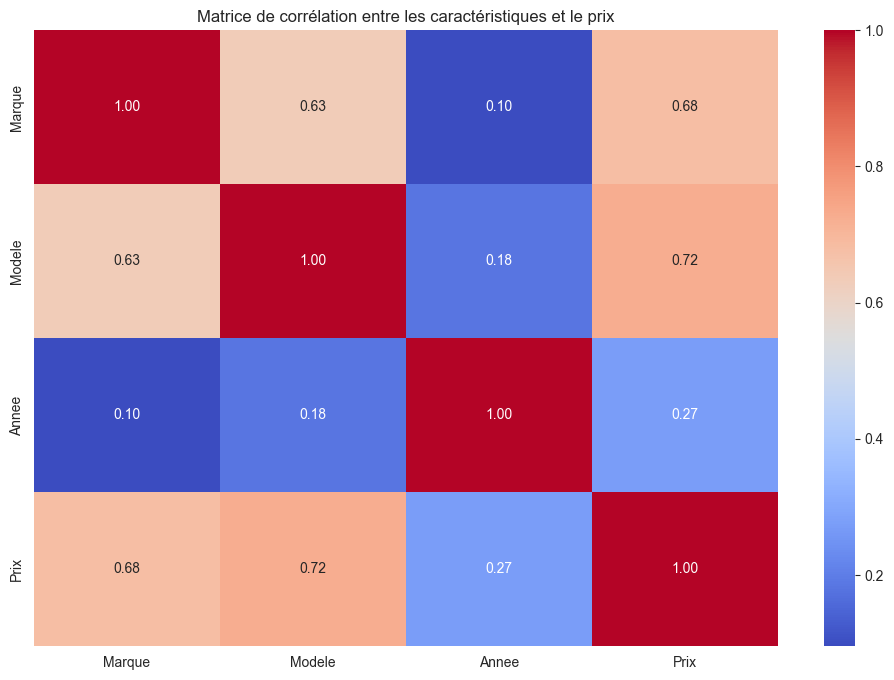

In [14]:
# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation entre les caractéristiques et le prix')
plt.show()

In [15]:
dfs_dict = create_dfs_from_csvs('../data/cleaning/relation/transformed/')

In [16]:
for col in dfs_dict.keys():
    data = dfs_dict[col]
    if 'Prix' in data.columns:
        data = data.drop(columns=['Prix'])
    df_clean = df_clean.merge(data, on='Immatriculation', how='left')

In [17]:
df_clean

,Marque,Modele,Annee,Prix,Immatriculation,Vitesse_maximale,0_a_100_km/h,Cylindree,Au_regime_de,Couple_maxi,...,longueur,largeur,hauteur,empattement,reservoir,porte_a_faux_avant,porte_a_faux_arriere,voies_avant,voies_arriere,garde_au_sol
0,2.819009e+07,2.819009e+07,3.095923e+07,55075273,7e546927-d3e3-477f-8971-b0cd70187264,160.0,8.6,2998.0,4750.0,450.0,...,4.90,1.93,2.05,2.92,90.0,0.8870,0.8740,1.6450,1.6450,264.0
1,3.341498e+07,2.753632e+07,1.729196e+07,24613286,fb2f74bc-f6e0-4624-967c-78d9466accfa,235.0,9.2,2597.0,4500.0,240.0,...,4.52,1.72,1.43,2.72,62.0,1.0038,1.1132,1.5000,1.4700,141.0
2,4.403130e+07,2.642971e+07,1.754328e+07,27841422,cab0aab1-ba72-4778-b7f4-d1efaa37d5a9,230.0,8.5,2720.0,1900.0,435.0,...,4.91,1.82,1.45,2.91,70.0,0.9508,1.0888,1.5340,1.5420,143.0
3,3.475627e+07,3.862237e+07,1.846534e+07,29377040,0285f39e-16ab-410d-939c-37de56206408,245.0,7.1,2979.0,3500.0,300.0,...,4.84,1.85,1.47,2.89,70.0,0.8404,1.0444,1.5580,1.5820,158.6
4,1.704447e+07,2.258660e+07,1.789735e+07,12418476,3ea13155-3031-4ade-836f-c72c593b671c,170.0,12.5,1686.0,2300.0,240.0,...,4.32,1.68,1.80,2.72,52.0,0.8314,0.7984,1.4170,1.4400,125.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6305,1.739198e+07,1.913730e+07,2.178347e+07,11133230,21b9fe07-34e8-448f-a360-f087ca3cd2d3,172.0,13.2,1422.0,2200.0,195.0,...,3.99,1.64,1.50,2.46,45.0,0.8510,0.6790,1.4360,1.4260,161.6
6306,3.341498e+07,2.549187e+07,2.583211e+07,24670037,dcc25760-5e24-4e17-a365-cb73e3c89108,205.0,11.9,1461.0,4000.0,260.0,...,4.63,1.78,1.44,2.70,50.0,0.9150,1.0160,1.5480,1.5450,161.0
6307,1.843507e+07,2.214443e+07,1.846534e+07,14955584,489ee77e-d482-4e7a-b89b-f478926222b3,195.0,11.4,1995.0,2120.0,234.0,...,4.52,1.71,1.43,2.63,60.0,0.8516,0.6990,1.5238,1.5234,144.6
6308,1.704447e+07,1.490668e+07,2.587975e+07,12612097,c9ad51ec-af8e-4072-a5d4-112b845a0d59,177.0,12.3,1248.0,1750.0,190.0,...,4.00,1.71,1.49,2.51,45.0,0.8382,0.6812,1.4850,1.4780,127.6


In [18]:
df_clean.to_csv("../data/cleaning/models/prepared_data_model.csv", index=False, header=True)

### 3.4 One Hot Encoding
Nous allons maintenant utiliser le codage à chaud unique. Le codage à chaud unique est une technique dans laquelle chaque catégorie d'une fonction est convertie en fonction et définie sur 1 une fois que la valeur particulière est présente dans les données.


Nous concaténerions les fonctionnalités avec X_train et X_test et supprimerions les fonctionnalités catégorielles réelles car elles ne devraient pas être données respectivement aux algorithmes d'apprentissage automatique.

## Transformation

In [ ]:
cols_to_explode = ['Resumer', 'Dimensions', 'Weight', 'Habitability', 'Tires', 'Engine', 'Transmission', 'Performance', 'Consumption']

### 2.1 Resumer

In [2]:
dataframes = process_data(
    explose_column='Resumer',
    n_neighbors=5,
    weights='uniform',
    target_col='Prix',
    max_unique_categories=10
)

In [3]:
df_transformed_resume = dataframes['df_transformed']
df_transformed_resume.head()

,puissance_commerciale,puissance_fiscale,consommation_mixte,emission_de_co2,Prix,energie_Electrique,energie_Essence,energie_Gaz,energie_Hybride,boite_de_vitesses_Manuelle,carrosserie,Immatriculation
0,286.0,0.0,14.4,325.0,55075273.0,0.0,1.0,0.0,0.0,0.0,3.089136e+07,7e546927-d3e3-477f-8971-b0cd70187264
1,157.4,12.0,10.8,148.6,24613286.0,0.0,1.0,0.0,0.0,1.0,3.278531e+07,fb2f74bc-f6e0-4624-967c-78d9466accfa
2,167.2,13.0,7.1,161.8,27841422.0,0.0,0.0,0.0,0.0,1.0,3.278531e+07,cab0aab1-ba72-4778-b7f4-d1efaa37d5a9
3,169.6,15.0,9.9,199.0,29377040.0,0.0,1.0,0.0,0.0,0.0,3.278531e+07,0285f39e-16ab-410d-939c-37de56206408
4,88.4,6.0,5.2,140.0,12418476.0,0.0,0.0,0.0,0.0,1.0,1.720609e+07,3ea13155-3031-4ade-836f-c72c593b671c


#### 2.1.1 Correlation

In [ ]:
plt.hist(df_transformed_resume['puissance_commerciale'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogramme de puissance_commerciale')
plt.xlabel('puissance_commerciale')
plt.ylabel('Fréquence')
plt.show()


In [ ]:
stats.probplot(df_transformed_resume['puissance_commerciale'], dist="norm", plot=plt)
plt.title('Q-Q Plot pour puissance_commerciale')
plt.show()

Description : 
- Un Q-Q plot compare la distribution de vos données avec une distribution normale. 
- Si vos données suivent une distribution normale, les points du Q-Q plot devraient se situer approximativement sur une ligne droite.

In [ ]:
p_coef, p_value = pearsonr(df_transformed_resume['boite_de_vitesses_Manuelle'], df_transformed_resume['Prix'])
print('Coefficient of determination:', format(p_coef, ".2f"))
print('P-Value:', format(p_value, ".2f"))

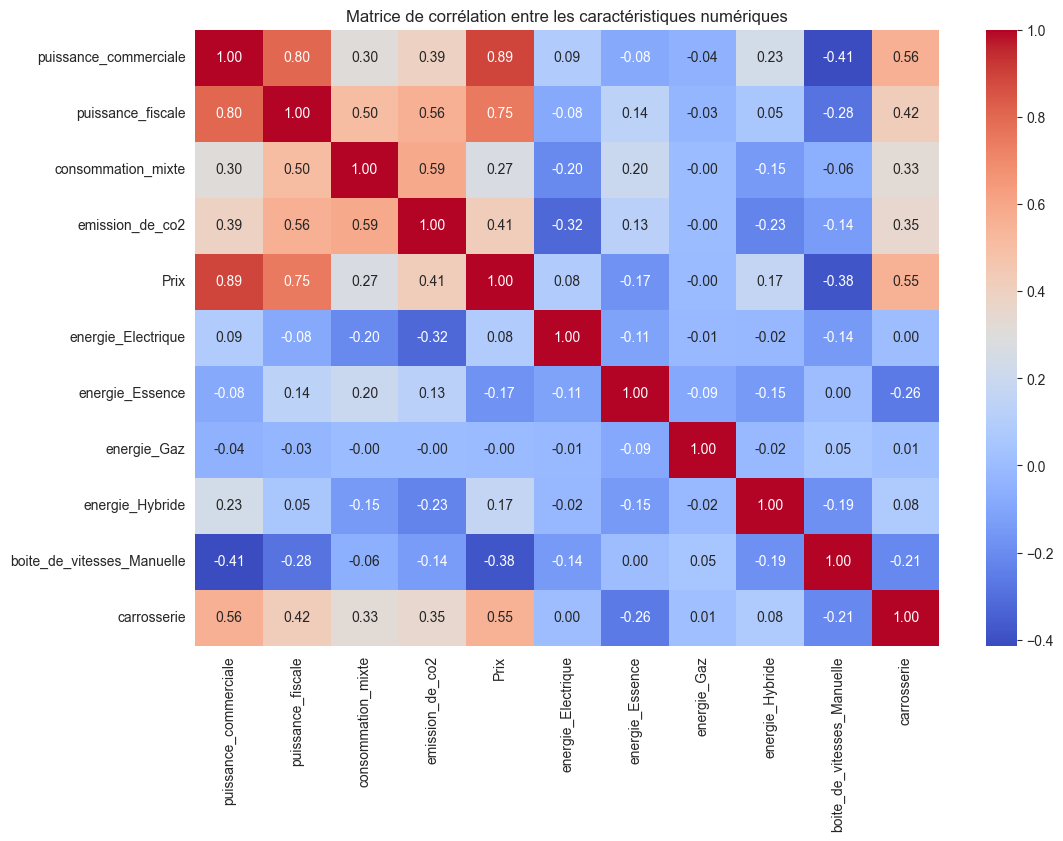

In [4]:
correlation_matrix = compute_correlation_matrix(df_transformed_resume)

In [6]:
p_values = compute_p_values(df_transformed_resume)

In [7]:
p_values

,puissance_commerciale,puissance_fiscale,consommation_mixte,emission_de_co2,Prix,energie_Electrique,energie_Essence,energie_Gaz,energie_Hybride,boite_de_vitesses_Manuelle,carrosserie
puissance_commerciale,1.000000e+00,0.000000e+00,2.404845e-135,3.474102e-225,0.000000e+00,2.360469e-12,3.303614e-11,4.601285e-04,2.332644e-78,4.461553e-259,0.000000e+00
puissance_fiscale,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.081197e-11,5.492416e-28,1.811770e-02,5.526684e-05,1.951560e-116,9.713796e-268
consommation_mixte,2.404845e-135,0.000000e+00,1.000000e+00,0.000000e+00,6.559106e-104,4.490777e-60,1.494759e-57,9.952282e-01,1.420018e-31,7.616058e-06,2.450893e-155
emission_de_co2,3.474102e-225,0.000000e+00,0.000000e+00,1.000000e+00,3.430335e-261,9.277989e-151,4.364174e-24,9.161730e-01,1.220310e-76,4.297376e-29,2.141328e-180
Prix,0.000000e+00,0.000000e+00,6.559106e-104,3.430335e-261,1.000000e+00,2.293575e-11,4.658359e-44,6.986573e-01,7.691262e-42,7.481146e-219,0.000000e+00
energie_Electrique,2.360469e-12,2.081197e-11,4.490777e-60,9.277989e-151,2.293575e-11,1.000000e+00,8.237571e-20,3.375286e-01,1.136200e-01,8.490030e-31,7.820731e-01
energie_Essence,3.303614e-11,5.492416e-28,1.494759e-57,4.364174e-24,4.658359e-44,8.237571e-20,1.000000e+00,1.147644e-12,5.454328e-32,8.913666e-01,2.536475e-100
energie_Gaz,4.601285e-04,1.811770e-02,9.952282e-01,9.161730e-01,6.986573e-01,3.375286e-01,1.147644e-12,1.000000e+00,2.162384e-01,6.513594e-05,3.073663e-01
energie_Hybride,2.332644e-78,5.526684e-05,1.420018e-31,1.220310e-76,7.691262e-42,1.136200e-01,5.454328e-32,2.162384e-01,1.000000e+00,2.126685e-50,9.699089e-11
boite_de_vitesses_Manuelle,4.461553e-259,1.951560e-116,7.616058e-06,4.297376e-29,7.481146e-219,8.490030e-31,8.913666e-01,6.513594e-05,2.126685e-50,1.000000e+00,3.454552e-64


In [10]:
cols_significant = find_significant_correlations(correlation_matrix, p_values)
cols_significant

['puissance_commerciale',
 'puissance_fiscale',
 'emission_de_co2',
 'boite_de_vitesses_Manuelle',
 'carrosserie']

### 2.2 Dimensions

In [2]:
dataframes = process_data(
    explose_column='Dimensions',
    n_neighbors=5,
    weights='uniform',
    target_col='Prix',
    max_unique_categories=10
)

In [3]:
df_transformed_dimensions = dataframes['df_transformed']
df_transformed_dimensions.head()

,longueur,largeur,hauteur,empattement,reservoir,porte_a_faux_avant,porte_a_faux_arriere,voies_avant,voies_arriere,garde_au_sol,Prix,Immatriculation
0,4.90,1.93,2.05,2.92,90.0,0.8870,0.8740,1.645,1.645,264.0,55075273.0,7e546927-d3e3-477f-8971-b0cd70187264
1,4.52,1.72,1.43,2.72,62.0,1.0038,1.1132,1.500,1.470,141.0,24613286.0,fb2f74bc-f6e0-4624-967c-78d9466accfa
2,4.91,1.82,1.45,2.91,70.0,0.9508,1.0888,1.534,1.542,143.0,27841422.0,cab0aab1-ba72-4778-b7f4-d1efaa37d5a9
3,4.84,1.85,1.47,2.89,70.0,0.8404,1.0444,1.558,1.582,158.6,29377040.0,0285f39e-16ab-410d-939c-37de56206408
4,4.32,1.68,1.80,2.72,52.0,0.8314,0.7984,1.417,1.440,125.6,12418476.0,3ea13155-3031-4ade-836f-c72c593b671c


#### 2.2.1 Correlation

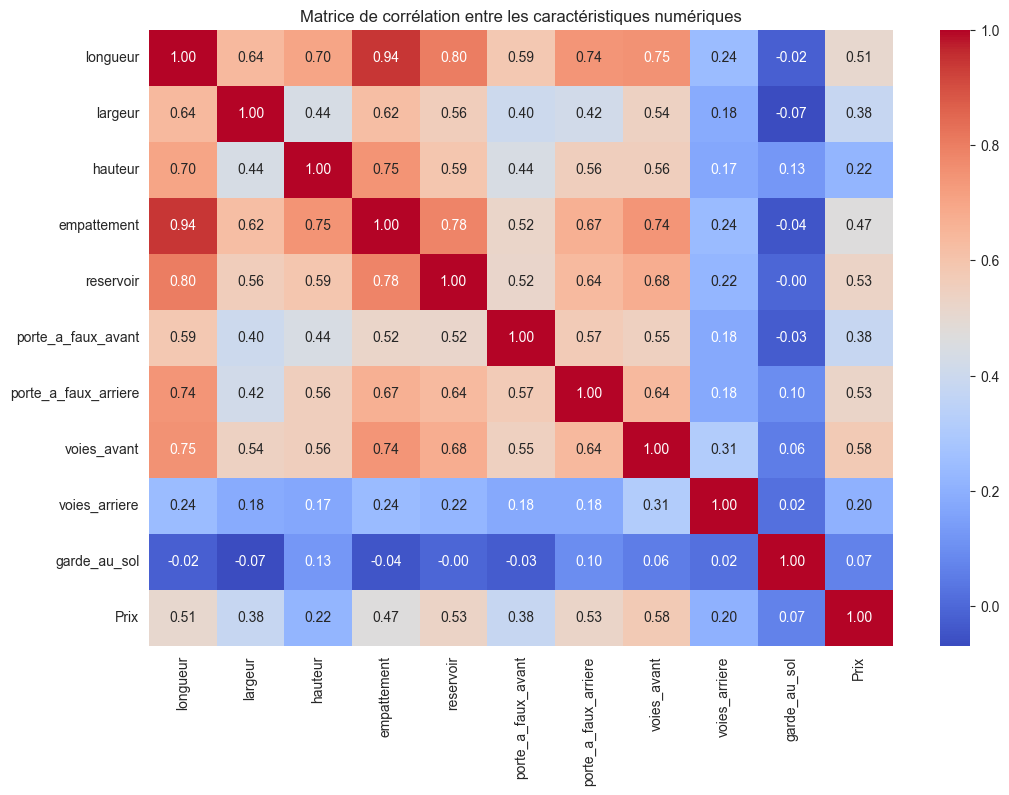

In [4]:
correlation_matrix = compute_correlation_matrix(df_transformed_dimensions)

In [5]:
p_values = compute_p_values(df_transformed_dimensions)
p_values

,longueur,largeur,hauteur,empattement,reservoir,porte_a_faux_avant,porte_a_faux_arriere,voies_avant,voies_arriere,garde_au_sol,Prix
longueur,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.016803e-84,1.144116e-01,0.000000e+00
largeur,0.000000e+00,1.000000e+00,2.901883e-293,0.000000e+00,0.000000e+00,1.697318e-242,3.039296e-264,0.000000e+00,1.588498e-49,4.487889e-08,2.530235e-214
hauteur,0.000000e+00,2.901883e-293,1.000000e+00,0.000000e+00,0.000000e+00,8.805347e-302,0.000000e+00,0.000000e+00,4.916409e-43,7.123924e-24,9.327840e-69
empattement,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.643240e-83,4.671461e-04,0.000000e+00
reservoir,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.765815e-71,7.981568e-01,0.000000e+00
porte_a_faux_avant,0.000000e+00,1.697318e-242,8.805347e-302,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.563345e-48,3.065527e-02,1.976861e-217
porte_a_faux_arriere,0.000000e+00,3.039296e-264,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.119380e-47,2.891417e-14,0.000000e+00
voies_avant,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.681192e-144,1.103797e-05,0.000000e+00
voies_arriere,4.016803e-84,1.588498e-49,4.916409e-43,7.643240e-83,6.765815e-71,8.563345e-48,1.119380e-47,2.681192e-144,1.000000e+00,9.283504e-02,3.453304e-60
garde_au_sol,1.144116e-01,4.487889e-08,7.123924e-24,4.671461e-04,7.981568e-01,3.065527e-02,2.891417e-14,1.103797e-05,9.283504e-02,1.000000e+00,1.311074e-07


In [15]:
cols_significant = find_significant_correlations(correlation_matrix, p_values)
cols_significant

['longueur',
 'largeur',
 'empattement',
 'reservoir',
 'porte_a_faux_avant',
 'porte_a_faux_arriere',
 'voies_avant']

### 2.3 Weight

In [46]:
dataframes = process_data(
    explose_column='Weight',
    n_neighbors=5,
    weights='uniform',
    target_col='Prix',
    max_unique_categories=10
)

In [47]:
df_transformed_weight = dataframes['df_transformed']
df_transformed_weight.head()

,poids_a_vide,ptac,ptra,charge_utile,poids_tracte_freine,poids_tracte_non_freine,Prix,Immatriculation
0,2669.0,3500.0,7000.0,831.0,3500.0,750.0,55075273.0,7e546927-d3e3-477f-8971-b0cd70187264
1,1535.0,2015.0,3515.0,480.0,1500.0,750.0,24613286.0,fb2f74bc-f6e0-4624-967c-78d9466accfa
2,1722.0,2255.0,4105.0,533.0,1850.0,750.0,27841422.0,cab0aab1-ba72-4778-b7f4-d1efaa37d5a9
3,1580.0,2065.0,4065.0,485.0,2000.0,750.0,29377040.0,0285f39e-16ab-410d-939c-37de56206408
4,1290.0,1855.0,2855.0,565.0,1000.0,521.0,12418476.0,3ea13155-3031-4ade-836f-c72c593b671c


#### 2.3.1 Correlation

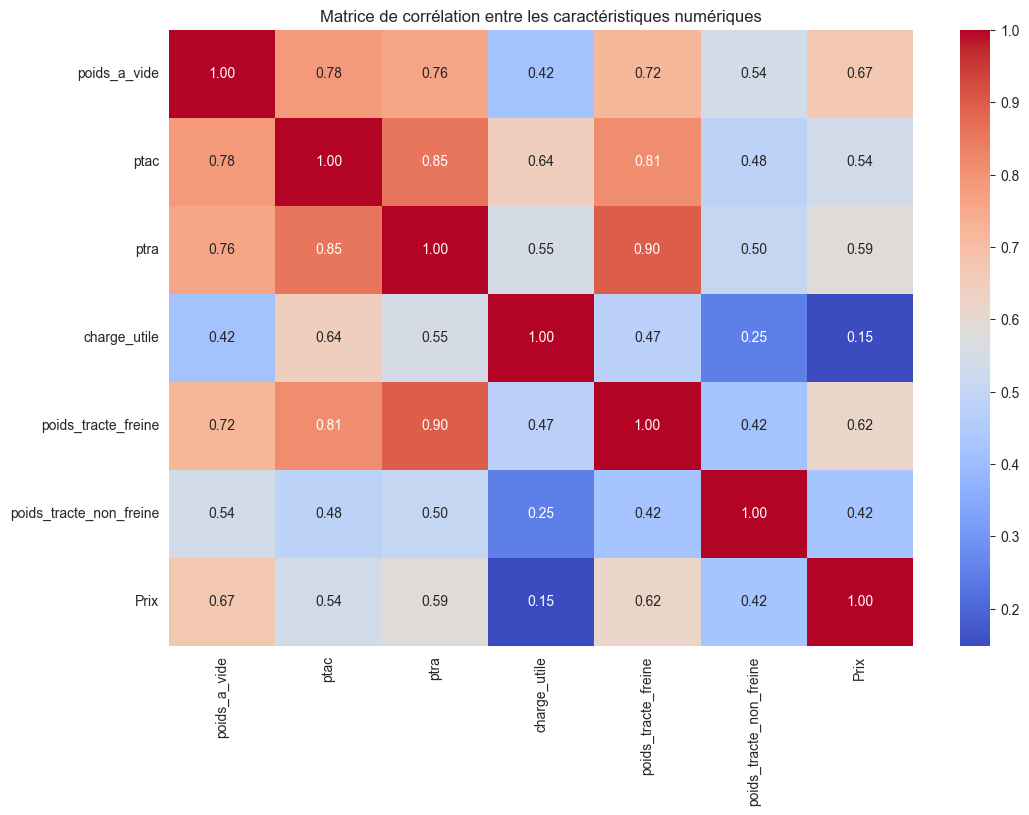

In [48]:
correlation_matrix = compute_correlation_matrix(df_transformed_weight)
p_values = compute_p_values(df_transformed_weight)

In [49]:
cols_significant = find_significant_correlations(correlation_matrix, p_values)
cols_significant

['poids_a_vide',
 'ptac',
 'ptra',
 'poids_tracte_freine',
 'poids_tracte_non_freine']

### 2.4 Habitability

In [20]:
dataframes = process_data(
    explose_column='Habitability',
    n_neighbors=5,
    weights='uniform',
    target_col='Prix',
    max_unique_categories=10
)

In [21]:
df_transformed_habitability = dataframes['df_transformed']
df_transformed_habitability.head()

,nombre_de_places,volume_de_coffre,volume_de_coffre_utile,Prix,Immatriculation
0,5.0,1152.0,2035.0,55075273.0,7e546927-d3e3-477f-8971-b0cd70187264
1,5.0,465.0,1510.0,24613286.0,fb2f74bc-f6e0-4624-967c-78d9466accfa
2,5.0,400.0,810.0,27841422.0,cab0aab1-ba72-4778-b7f4-d1efaa37d5a9
3,5.0,520.0,1775.0,29377040.0,0285f39e-16ab-410d-939c-37de56206408
4,5.0,455.0,2700.0,12418476.0,3ea13155-3031-4ade-836f-c72c593b671c


#### 2.4.1 Correlation

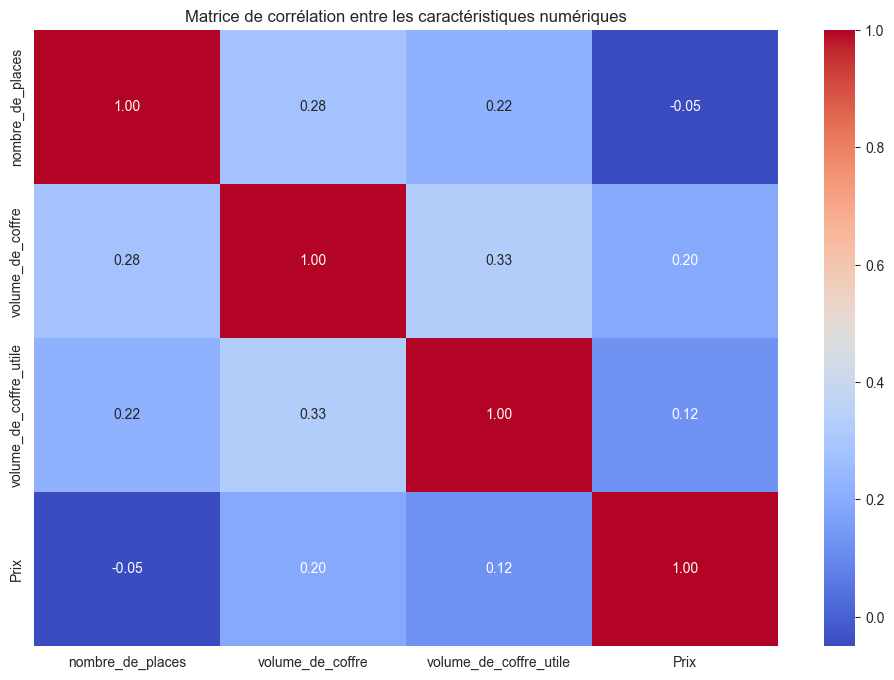

In [22]:
correlation_matrix = compute_correlation_matrix(df_transformed_habitability)
p_values = compute_p_values(df_transformed_habitability)

In [23]:
cols_significant = find_significant_correlations(correlation_matrix, p_values)
cols_significant

[]

### 2.5 Tires

In [24]:
dataframes = process_data(
    explose_column='Tires',
    n_neighbors=5,
    weights='uniform',
    target_col='Prix',
    max_unique_categories=10
)

In [25]:
df_transformed_tires = dataframes['df_transformed']
df_transformed_tires.head()

,Prix,materiau_des_jantes_Alu,materiau_des_jantes_Aluminium,materiau_des_jantes_Enjoliveurs,materiau_des_jantes_Peintes,materiau_des_jantes_nan,types_de_pneumatiques,taille_des_roues_avant,taille_des_roues_arriere,type_de_roues_de_secours,Immatriculation
0,55075273.0,0.0,1.0,0.0,0.0,0.0,2.459872e+07,2.819009e+07,2.819009e+07,2.272727e+07,7e546927-d3e3-477f-8971-b0cd70187264
1,24613286.0,0.0,0.0,0.0,0.0,1.0,2.059561e+07,1.921985e+07,1.915882e+07,1.947653e+07,fb2f74bc-f6e0-4624-967c-78d9466accfa
2,27841422.0,0.0,1.0,0.0,0.0,0.0,2.059561e+07,2.500776e+07,2.523724e+07,2.471539e+07,cab0aab1-ba72-4778-b7f4-d1efaa37d5a9
3,29377040.0,0.0,0.0,0.0,0.0,1.0,2.059561e+07,2.955121e+07,2.956945e+07,1.947653e+07,0285f39e-16ab-410d-939c-37de56206408
4,12418476.0,0.0,1.0,0.0,0.0,0.0,2.059561e+07,1.161204e+07,1.148979e+07,2.272727e+07,3ea13155-3031-4ade-836f-c72c593b671c


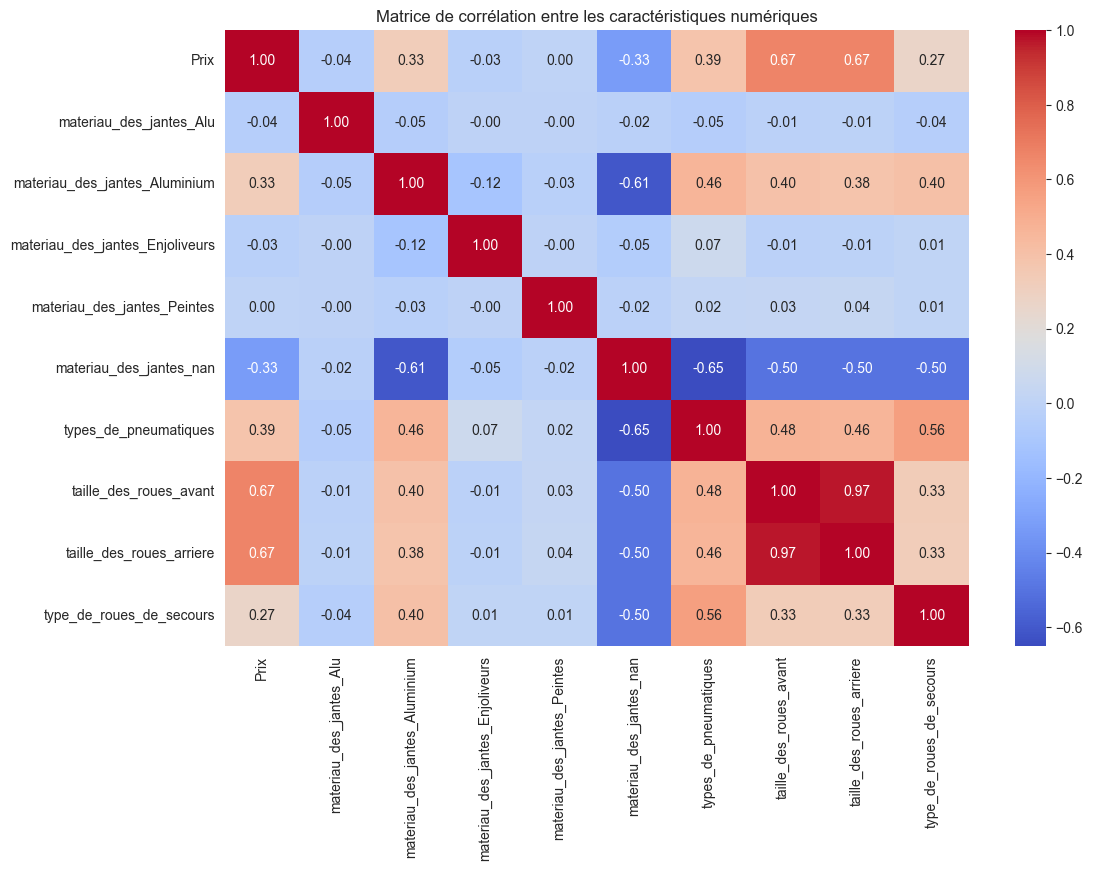

In [26]:
correlation_matrix = compute_correlation_matrix(df_transformed_tires)
p_values = compute_p_values(df_transformed_tires)

In [27]:
cols_significant = find_significant_correlations(correlation_matrix, p_values)
cols_significant

['materiau_des_jantes_Aluminium',
 'materiau_des_jantes_nan',
 'types_de_pneumatiques',
 'taille_des_roues_avant',
 'taille_des_roues_arriere']

### 2.6 Engine

In [28]:
dataframes = process_data(
    explose_column='Engine',
    n_neighbors=5,
    weights='uniform',
    target_col='Prix',
    max_unique_categories=10
)

In [29]:
df_transformed_engine = dataframes['df_transformed']
df_transformed_engine.head()

,Cylindree,Au_regime_de,Couple_maxi,Nombre_de_soupapes,Rapport_volumetrique,Puissance_reelle_maxi_kW,Alesage,Course,Prix,Energie_Electrique,...,Norme_anti-pollution_Euro 4,Norme_anti-pollution_Euro 5,Norme_anti-pollution_Euro 6,Norme_anti-pollution_nan,Architecture,Alimentation,Injection,Disposition_du_moteur,Puissance_reelle_maxi_ch,Immatriculation
0,2998.0,4750.0,450.0,24.0,11.0,210.0,82.0,94.6,55075273.0,0.0,...,0.0,0.0,1.0,0.0,4.056354e+07,2.543224e+07,3.146036e+07,3.828318e+07,4.580941e+07,7e546927-d3e3-477f-8971-b0cd70187264
1,2597.0,4500.0,240.0,18.0,10.5,125.0,89.9,68.2,24613286.0,0.0,...,1.0,0.0,0.0,0.0,3.976170e+07,1.940694e+07,1.894061e+07,3.828318e+07,2.860719e+07,fb2f74bc-f6e0-4624-967c-78d9466accfa
2,2720.0,1900.0,435.0,24.0,17.3,153.0,81.0,88.0,27841422.0,0.0,...,0.0,0.0,0.0,1.0,3.976170e+07,4.469067e+07,2.668097e+07,3.828318e+07,2.471728e+07,cab0aab1-ba72-4778-b7f4-d1efaa37d5a9
3,2979.0,3500.0,300.0,24.0,10.2,170.0,84.0,89.6,29377040.0,0.0,...,0.0,0.0,0.0,1.0,4.056354e+07,1.940694e+07,1.894061e+07,3.828318e+07,3.103949e+07,0285f39e-16ab-410d-939c-37de56206408
4,1686.0,2300.0,240.0,16.0,18.4,74.0,79.0,86.0,12418476.0,0.0,...,1.0,0.0,0.0,0.0,2.307234e+07,2.627602e+07,2.668097e+07,2.168137e+07,1.370729e+07,3ea13155-3031-4ade-836f-c72c593b671c


#### Correlation

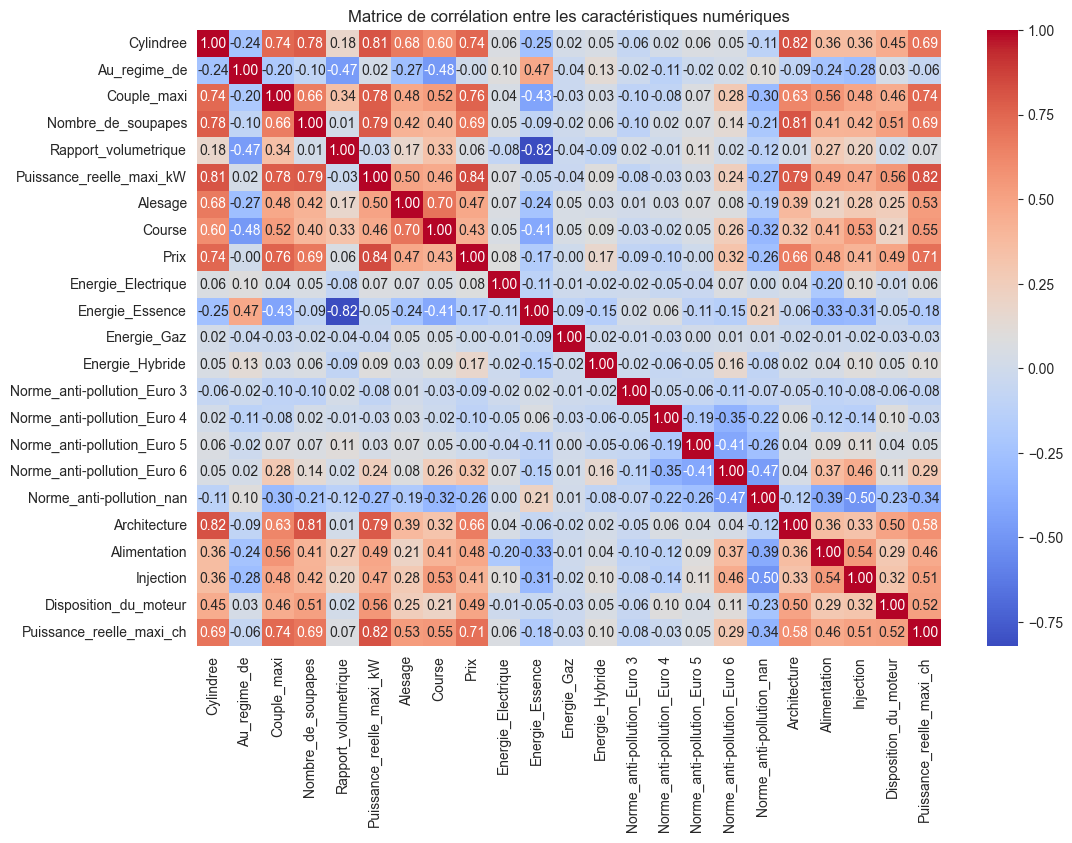

In [30]:
correlation_matrix = compute_correlation_matrix(df_transformed_engine)
p_values = compute_p_values(df_transformed_engine)

In [31]:
cols_significant = find_significant_correlations(correlation_matrix, p_values)
cols_significant

['Cylindree',
 'Couple_maxi',
 'Nombre_de_soupapes',
 'Puissance_reelle_maxi_kW',
 'Alesage',
 'Course',
 'Norme_anti-pollution_Euro 6',
 'Architecture',
 'Alimentation',
 'Injection',
 'Disposition_du_moteur',
 'Puissance_reelle_maxi_ch']

### 2.7 Transmission

In [32]:
dataframes = process_data(
    explose_column='Transmission',
    n_neighbors=5,
    weights='uniform',
    target_col='Prix',
    max_unique_categories=10
)

In [33]:
df_transformed_transmission = dataframes['df_transformed']
df_transformed_transmission.head()

,Prix,Boite_de_vitesses,Mode_de_transmission,Immatriculation
0,55075273.0,3.678985e+07,3.537250e+07,7e546927-d3e3-477f-8971-b0cd70187264
1,24613286.0,2.420237e+07,3.386491e+07,fb2f74bc-f6e0-4624-967c-78d9466accfa
2,27841422.0,2.420237e+07,3.386491e+07,cab0aab1-ba72-4778-b7f4-d1efaa37d5a9
3,29377040.0,2.929526e+07,3.386491e+07,0285f39e-16ab-410d-939c-37de56206408
4,12418476.0,1.406516e+07,1.947041e+07,3ea13155-3031-4ade-836f-c72c593b671c


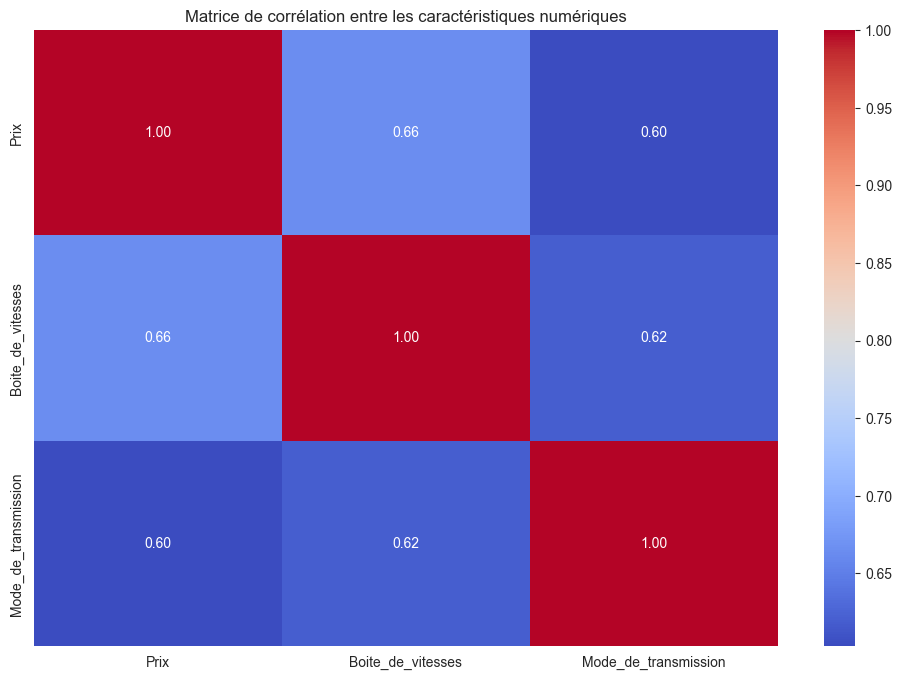

In [36]:
correlation_matrix = compute_correlation_matrix(df_transformed_transmission)
p_values = compute_p_values(df_transformed_transmission)

In [37]:
cols_significant = find_significant_correlations(correlation_matrix, p_values)
cols_significant

['Boite_de_vitesses', 'Mode_de_transmission']

### 2.8 Performance

In [38]:
dataframes = process_data(
    explose_column='Performance',
    n_neighbors=5,
    weights='uniform',
    target_col='Prix',
    max_unique_categories=10
)

In [39]:
df_transformed_performance = dataframes['df_transformed']
df_transformed_performance.head()

,Vitesse_maximale,0_a_100_km/h,Prix,Immatriculation
0,160.0,8.6,55075273.0,7e546927-d3e3-477f-8971-b0cd70187264
1,235.0,9.2,24613286.0,fb2f74bc-f6e0-4624-967c-78d9466accfa
2,230.0,8.5,27841422.0,cab0aab1-ba72-4778-b7f4-d1efaa37d5a9
3,245.0,7.1,29377040.0,0285f39e-16ab-410d-939c-37de56206408
4,170.0,12.5,12418476.0,3ea13155-3031-4ade-836f-c72c593b671c


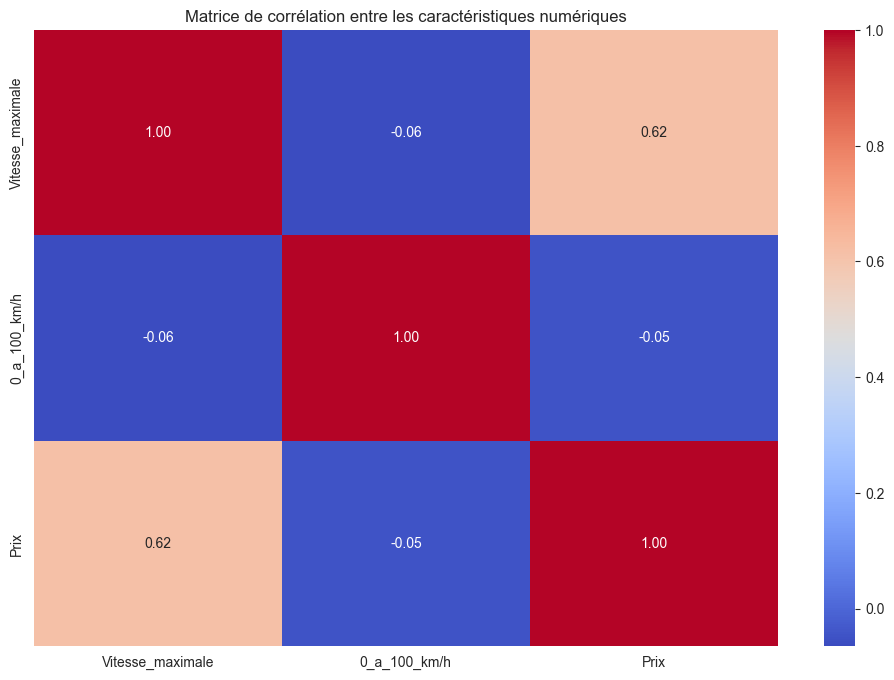

In [40]:
correlation_matrix = compute_correlation_matrix(df_transformed_performance)
p_values = compute_p_values(df_transformed_performance)

In [41]:
cols_significant = find_significant_correlations(correlation_matrix, p_values)
cols_significant

['Vitesse_maximale']

### 2.9 Consumption

In [42]:
dataframes = process_data(
    explose_column='Consumption',
    n_neighbors=5,
    weights='uniform',
    target_col='Prix',
    max_unique_categories=10
)

In [43]:
df_transformed_consumption = dataframes['df_transformed']
df_transformed_consumption.head()

,Mixte,Emission_de_CO2,Cycle_urbain,Extra_urbain,Prix,Immatriculation
0,14.4,325.0,13.46,7.48,55075273.0,7e546927-d3e3-477f-8971-b0cd70187264
1,10.8,259.0,16.00,7.80,24613286.0,fb2f74bc-f6e0-4624-967c-78d9466accfa
2,7.1,189.0,9.70,5.70,27841422.0,cab0aab1-ba72-4778-b7f4-d1efaa37d5a9
3,9.9,245.0,14.20,7.50,29377040.0,0285f39e-16ab-410d-939c-37de56206408
4,5.2,140.0,6.60,4.40,12418476.0,3ea13155-3031-4ade-836f-c72c593b671c


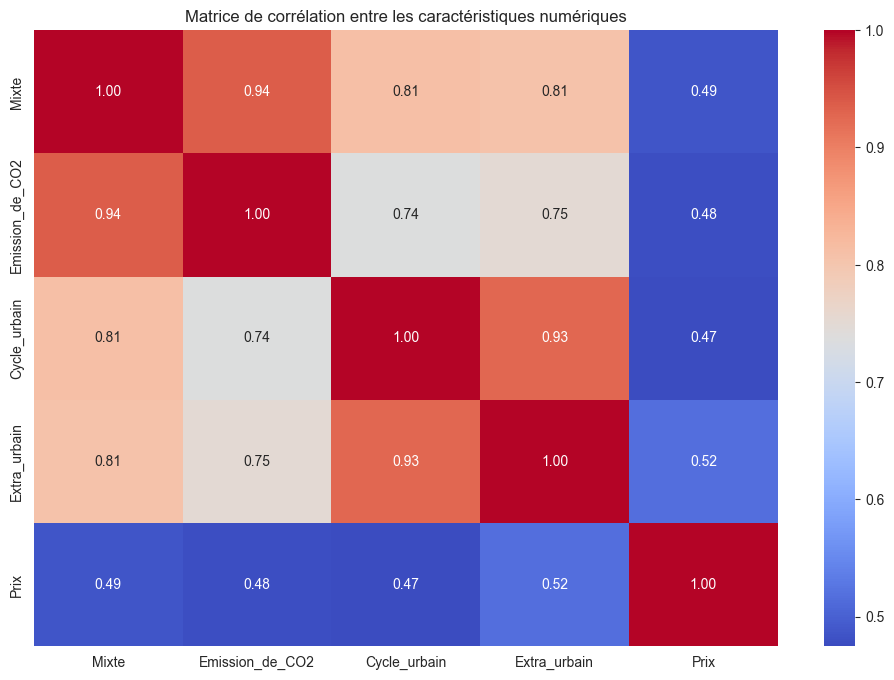

In [44]:
correlation_matrix = compute_correlation_matrix(df_transformed_consumption)
p_values = compute_p_values(df_transformed_consumption)

In [45]:
cols_significant = find_significant_correlations(correlation_matrix, p_values)
cols_significant

['Mixte', 'Emission_de_CO2', 'Cycle_urbain', 'Extra_urbain']